## Netflix Analysis

In [296]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("dark")

%matplotlib inline

##### Load Netflix TV and Shows Dataset

In [297]:
netflix_df = pd.read_csv('https://raw.githubusercontent.com/ahmedmeshref/Netflex-Data-Analysis/main/netflix_titles.csv')

##### Shape of dataset (rows, cols)

In [298]:
print(f'Number of rows: {netflix_df.shape[0]}, Columsn: {netflix_df.shape[1]}')

Number of rows: 7787, Columsn: 12


##### Load first 5 rows of the dataset

In [299]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Understand dataset

In [300]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##### Check for unique values

In [301]:
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

##### Check NULL values

In [302]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

##### Check for duplicated rows 

In [303]:
netflix_df.duplicated().any()

False

### Data Cleaning 

##### Drop NULL values

In [304]:
netflix_df = netflix_df.dropna()

In [305]:
print(f'Number of rows: {netflix_df.shape[0]}, Columsn: {netflix_df.shape[1]}')

Number of rows: 4808, Columsn: 12


##### Change Dates format    

In [306]:
netflix_df['release_year'].astype(int);
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

##### Extract the year_added col from the date_added col 

In [307]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year

##### (TODO) Extract the genres of the movies from the listed_in column 

In [308]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017


### Data Analysis & Visualization

##### Show number of Movies & Shows added to the website from year 2008-2021

In [309]:
netflix_df['date_added'].groupby([netflix_df.year_added]).agg('count')

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     207
2017     752
2018    1114
2019    1337
2020    1229
2021      78
Name: date_added, dtype: int64

/home/ahmed/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


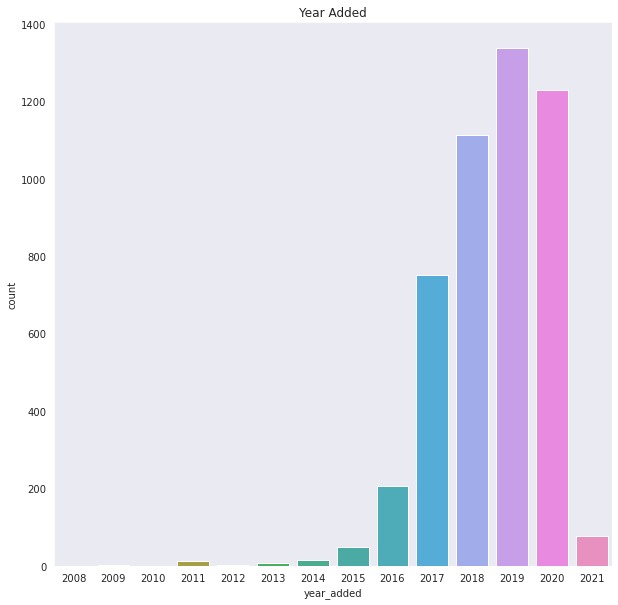

In [310]:
plt.figure(figsize=(10,10))
sns.countplot(netflix_df['year_added'])
plt.title('Year Added')
plt.show()

##### Show number of movies && TV Shows released in each one of the last 5 years

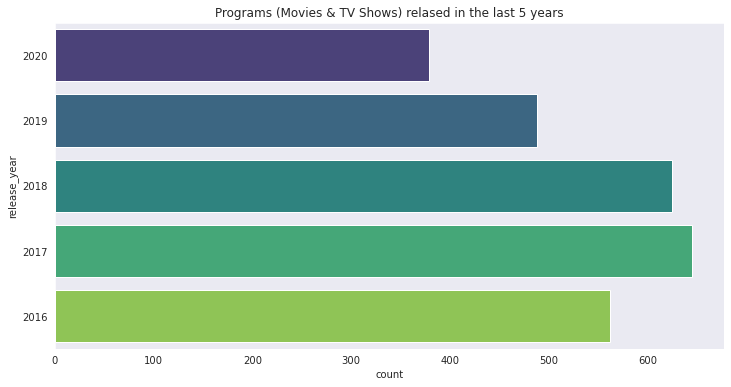

In [311]:
plt.figure(figsize=(12,6))
sns.countplot(data=netflix_df, y="release_year", order=[2020, 2019, 2018, 2017, 2016], palette="viridis")
plt.title('Programs (Movies & TV Shows) relased in the last 5 years')
plt.show()

##### Movies VS TV shows trend in the last 5 years at Netflix

<ipython-input-312-4c2f3b36bae6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df =  netflix_df[netflix_df.release_year >= 2016][netflix_df.release_year < 2021]


<Figure size 720x720 with 0 Axes>

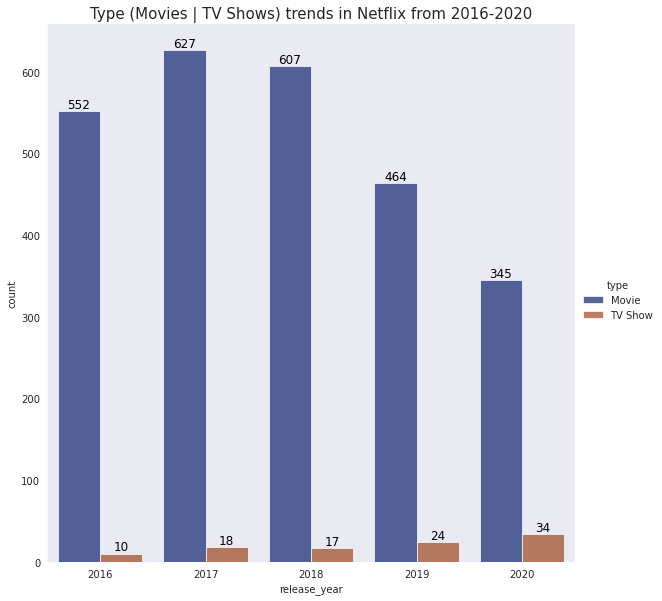

In [312]:
plt.figure(figsize=(10,10))

df =  netflix_df[netflix_df.release_year >= 2016][netflix_df.release_year < 2021]

g = sns.catplot(
    data=df, kind="count",
    x="release_year", hue="type",
    ci="sd", palette="dark", alpha=.7, height=8)

ax = plt.gca()

# Iterate through the list of axes' patches to show number of each patch 
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Type (Movies | TV Shows) trends in Netflix from 2016-2020',size='15')
plt.show()

#### Top 5 countries that produces movies in the last 5 years

In [313]:
# Countries contribution to programs production from 2016 - 2020 
top_contributors_last_5_years = netflix_df.query("release_year >= 2016").query("release_year < 2021").groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
top_contributors_last_5_years

,country,count
299,United States,938
115,India,364
255,United Kingdom,109
29,Canada,78
214,Spain,73
...,...,...
178,"Pakistan, United Arab Emirates",1
179,"Paraguay, Argentina",1
17,Belgium,1
181,"Peru, Germany, Norway",1


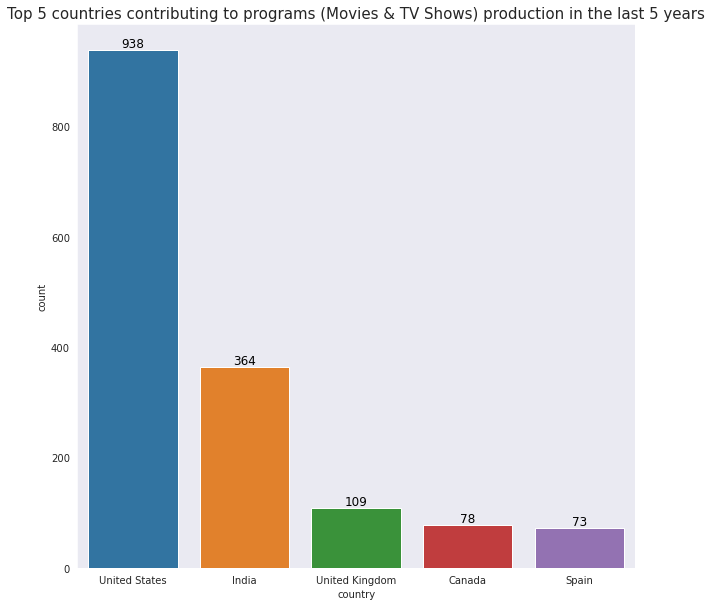

In [314]:
plt.figure(figsize=(10,10))

# plot the contribution of the top 5 contributors in the last 5 years 
sns.barplot(x='country',y='count',data=top_contributors_last_5_years[:5])

# Get current axis on current figure
ax = plt.gca()


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Top 5 countries contributing to programs (Movies & TV Shows) production in the last 5 years', size='15')    
plt.show()

#### The US is the top programs contributer in the last 5 years. Plot its contribution of movies and tv shows in the last 5 years 

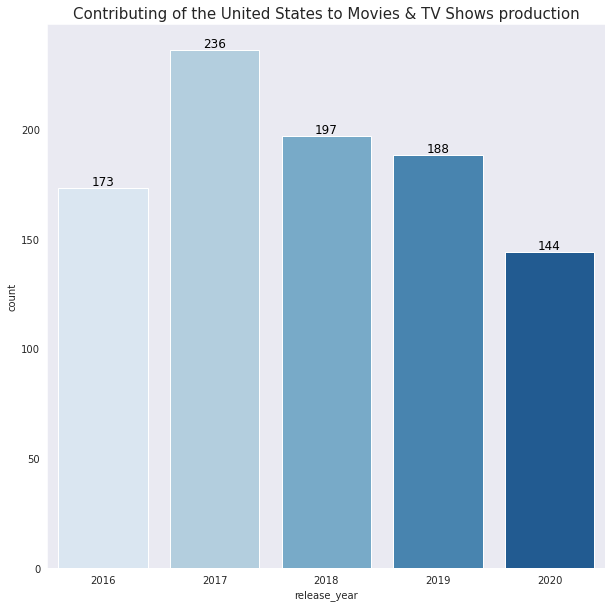

In [315]:
plt.figure(figsize=(10,10))

# Filter the United States movies and TV shows 
US_contribution = netflix_df[netflix_df['country'] == 'United States']

# Count the total contribution by the US in the last 5 years  
US_contribution_last_5_years = US_contribution.query("release_year >= 2016").query("release_year < 2021").groupby(['country', 'release_year'])['show_id'].count().reset_index(name='count')
US_contribution_last_5_years


sns.barplot(x='release_year',y='count',data=US_contribution_last_5_years, palette = "Blues")

# Get current axis on current figure
ax = plt.gca()


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Contributing of the United States to Movies & TV Shows production', size='15')    
plt.show()

TODO: 
- Use the ratings col to find more insights 
- Extract the Genres from the listed_in column and vituzalize the top rates movies per genre, count number of movies per genre. 